<a href="https://colab.research.google.com/github/RebatiGaire/HandWrittenDigitRecognition/blob/master/HandWrittenDigitRecog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np

import matplotlib.pyplot as plt




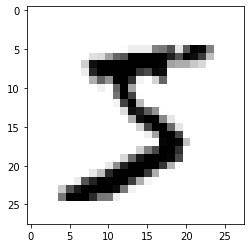

In [56]:
# load Data

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [0]:
# data normalization

x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

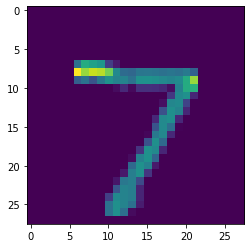

In [58]:
print(x_test[0])
plt.imshow(x_test[0])
plt.show()

In [0]:
# building model

model = keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


In [60]:
# compiling model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 4)


Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2647 - acc: 0.9216
Epoch 2/4
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1056 - acc: 0.9671
Epoch 3/4
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0717 - acc: 0.9772
Epoch 4/4
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0550 - acc: 0.9822


In [61]:
# evaluate model

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.0795 - acc: 0.9757
0.07954782768641598 0.9757


In [0]:
# save model

model.save('digitRecog.model')

In [67]:
# load the model back

new_model = tf.keras.models.load_model('digitRecog.model')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


1


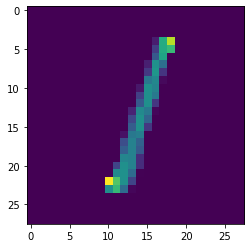

In [75]:
# make prediction

predictions = new_model.predict(x_test)
print(np.argmax(predictions[2]))
plt.imshow(x_test[2])
plt.show()
